In [3]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as  pd
import numpy as np

## Functions

In [4]:
def missing_values(df):
    """
        input: dataframe
        returns: dict with 
                    Key => Column name 
                    Value => number of missing values
    """    
    missing_values_dict = {}

    for i, var in enumerate(df.columns):
        missing_values_dict[var] = np.sum(df[var].isnull())
    
    return missing_values_dict

## Reading the data

1. loading district data
2. loding migration data

In [5]:
# loading district data
shp_path = '../data/shrug-pc11dist-poly-shp/district.shp'  # this is relative path

# loading migration data
mig_csv_path = '../data/covid_data/migration/csv/district_migration_pc11.csv'

In [6]:
gdf = gpd.read_file(shp_path)  # geo-spatial dataframe for district shape file

df_mig = pd.read_csv(mig_csv_path)  # pandas dataframe for migration

DriverError: ../data/shrug-pc11dist-poly-shp/district.shp: No such file or directory

In [ ]:
gdf.head()

,pc11_s_id,pc11_d_id,d_name,geometry
0,24,468,Kachchh,"MULTIPOLYGON (((70.45008 23.01226, 70.44904 23..."
1,24,469,Banas Kantha,"MULTIPOLYGON (((71.24964 24.20926, 71.24207 24..."
2,24,470,Patan,"MULTIPOLYGON (((71.42507 23.96967, 71.42497 23..."
3,24,471,Mahesana,"POLYGON ((72.79975 24.07615, 72.80022 24.07529..."
4,24,472,Sabar Kantha,"POLYGON ((73.14784 24.47759, 73.14773 24.47410..."


Plotting the district map

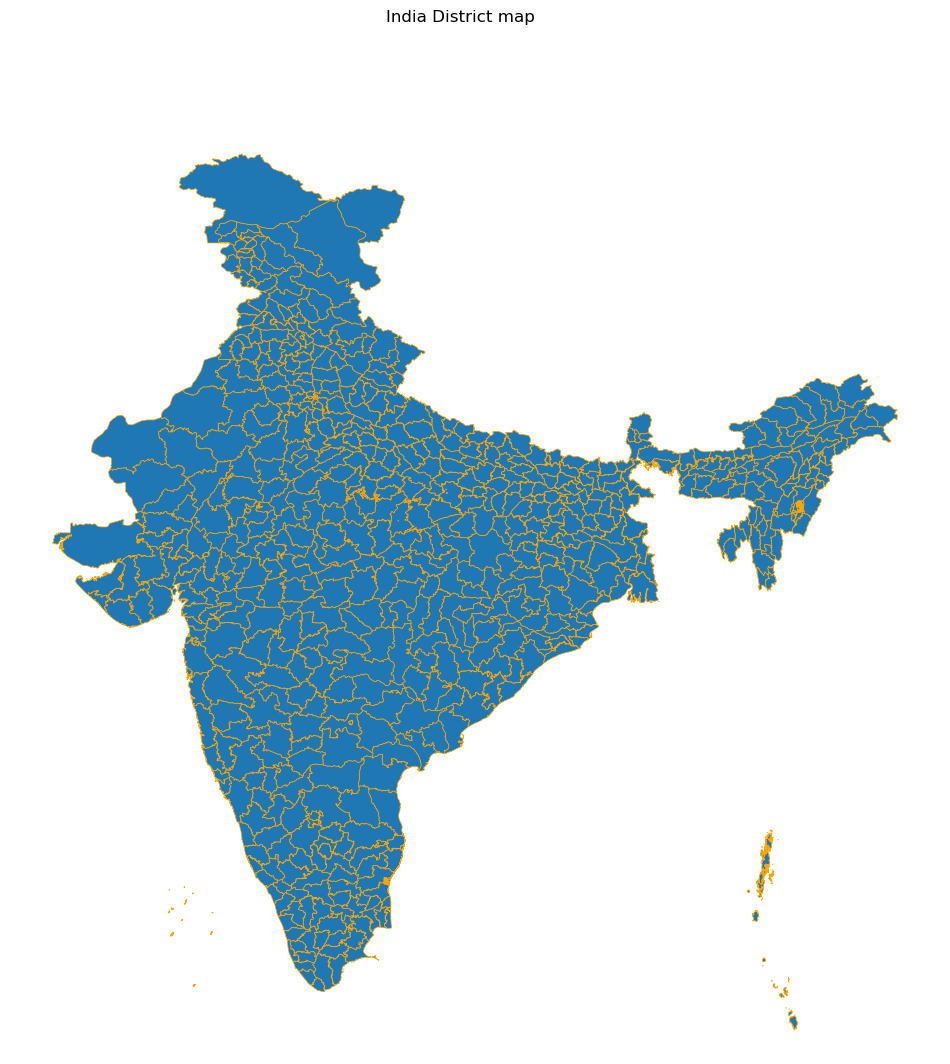

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis
gdf.plot(linewidth=0.5, edgecolor='orange', ax=ax)
ax.set_axis_off()
f.suptitle('India District map')
plt.axis('equal')
plt.show()

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Lets look into migration data

In [ ]:
df_mig.head()

,pc11_state_id,pc11_district_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
0,1,1,8185802.0,0.000751,0.000080,10900000.0,0.001468,0.000118,8185802,0.002328,0.000247,10900000,0.001602,0.000128
1,1,2,8185802.0,0.001551,0.000143,10900000.0,0.001404,0.000097,8185802,0.002037,0.000188,10900000,0.001185,0.000082
2,1,3,8185802.0,0.000427,0.000007,10900000.0,0.006163,0.000076,8185802,0.006820,0.000111,10900000,0.000000,0.000000
3,1,4,8185802.0,0.000433,0.000007,10900000.0,0.005456,0.000071,8185802,0.001697,0.000029,10900000,0.000000,0.000000
4,1,5,8185802.0,0.001091,0.000064,10900000.0,0.000412,0.000018,8185802,0.004508,0.000263,10900000,0.000000,0.000000


variables  in `migration` data

In [ ]:
df_mig.columns

Index(['pc11_state_id', 'pc11_district_id', 'inltmigrantstotal',
       'inltmigrationrate', 'inltmigrationshare', 'instmigrantstotal',
       'instmigrationrate', 'instmigrationshare', 'outltmigrantstotal',
       'outltmigrationrate', 'outltmigrationshare', 'outstmigrantstotal',
       'outstmigrationrate', 'outstmigrationshare'],
      dtype='object')

### Changing the column names

 Column names are a bit too weird, so lets change the column names

| Old Variable Name | New variable name |
| ----------------- | ----------------- |
| pc11_state_id     | pc11_s_id	        |
| pc11_district_id  | pc11_d_id         |

In [ ]:
new_column_names = {
    'pc11_state_id' : 'pc11_s_id', 
    'pc11_district_id' : 'pc11_d_id' 
}

df_mig = df_mig.rename(columns=new_column_names)

In [ ]:
df_mig.head()

,pc11_s_id,pc11_d_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
0,1,1,8185802.0,0.000751,0.000080,10900000.0,0.001468,0.000118,8185802,0.002328,0.000247,10900000,0.001602,0.000128
1,1,2,8185802.0,0.001551,0.000143,10900000.0,0.001404,0.000097,8185802,0.002037,0.000188,10900000,0.001185,0.000082
2,1,3,8185802.0,0.000427,0.000007,10900000.0,0.006163,0.000076,8185802,0.006820,0.000111,10900000,0.000000,0.000000
3,1,4,8185802.0,0.000433,0.000007,10900000.0,0.005456,0.000071,8185802,0.001697,0.000029,10900000,0.000000,0.000000
4,1,5,8185802.0,0.001091,0.000064,10900000.0,0.000412,0.000018,8185802,0.004508,0.000263,10900000,0.000000,0.000000


## Missing data in migration file

### Datatypes of the dataframe

In [ ]:
df_mig.dtypes

pc11_s_id                int64
pc11_d_id                int64
inltmigrantstotal      float64
inltmigrationrate      float64
inltmigrationshare     float64
instmigrantstotal      float64
instmigrationrate      float64
instmigrationshare     float64
outltmigrantstotal       int64
outltmigrationrate     float64
outltmigrationshare    float64
outstmigrantstotal       int64
outstmigrationrate     float64
outstmigrationshare    float64
dtype: object

In [ ]:
# missing values dict
dict_missing_values = {}

for i, var in enumerate(df_mig.columns):
    dict_missing_values[var] = np.sum(df_mig[var].isnull())

In [ ]:
dict_missing_values

{'pc11_s_id': 0,
 'pc11_d_id': 0,
 'inltmigrantstotal': 1,
 'inltmigrationrate': 1,
 'inltmigrationshare': 1,
 'instmigrantstotal': 1,
 'instmigrationrate': 1,
 'instmigrationshare': 1,
 'outltmigrantstotal': 0,
 'outltmigrationrate': 0,
 'outltmigrationshare': 0,
 'outstmigrantstotal': 0,
 'outstmigrationrate': 0,
 'outstmigrationshare': 0}

> All the in-migration variables are exactly **missing one value/observation**

picking a variable to see which district is missing in-migration values

### Merging dataframes

Combining Migration with Spatial dataframe

> Merging the dataframes on `pc11_d_id`, which is *district id* & using `left` join, such that no spatial data is lost

In [ ]:
gdf.dtypes

pc11_s_id      object
pc11_d_id      object
d_name         object
geometry     geometry
dtype: object

* gdf has `pc11_d_id` datatype as object so lets change it to int64, also for `pc11_d_id`

In [ ]:
gdf["pc11_s_id"] = gdf["pc11_s_id"].astype(int)
gdf["pc11_d_id"] = gdf["pc11_d_id"].astype(int)

In [ ]:
gdf.dtypes

pc11_s_id       int32
pc11_d_id       int32
d_name         object
geometry     geometry
dtype: object

In [ ]:
# merging thhe dataframes

spatial_df = gdf.merge(df_mig, on='pc11_d_id', how='left')

In [ ]:
spatial_df.head()

,pc11_s_id_x,pc11_d_id,d_name,geometry,pc11_s_id_y,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
0,24,468,Kachchh,"MULTIPOLYGON (((70.45008 23.01226, 70.44904 23...",24.0,8185802.0,0.023293,0.005954,10900000.0,0.009460,0.001822,8185802.0,0.007707,0.001970,10900000.0,0.005534,0.001066
1,24,469,Banas Kantha,"MULTIPOLYGON (((71.24964 24.20926, 71.24207 24...",24.0,8185802.0,0.003405,0.001298,10900000.0,0.002344,0.000673,8185802.0,0.004988,0.001901,10900000.0,0.000033,0.000010
2,24,470,Patan,"MULTIPOLYGON (((71.42507 23.96967, 71.42497 23...",24.0,8185802.0,0.007048,0.001157,10900000.0,0.004314,0.000534,8185802.0,0.009333,0.001532,10900000.0,0.003086,0.000382
3,24,471,Mahesana,"POLYGON ((72.79975 24.07615, 72.80022 24.07529...",24.0,8185802.0,0.007764,0.001930,10900000.0,0.008950,0.001677,8185802.0,0.014757,0.003669,10900000.0,0.000463,0.000087
4,24,472,Sabar Kantha,"POLYGON ((73.14784 24.47759, 73.14773 24.47410...",24.0,8185802.0,0.004494,0.001333,10900000.0,0.006931,0.001550,8185802.0,0.006483,0.001924,10900000.0,0.002095,0.000468


lets print the columns

In [ ]:
spatial_df.columns

Index(['pc11_s_id_x', 'pc11_d_id', 'd_name', 'geometry', 'pc11_s_id_y',
       'inltmigrantstotal', 'inltmigrationrate', 'inltmigrationshare',
       'instmigrantstotal', 'instmigrationrate', 'instmigrationshare',
       'outltmigrantstotal', 'outltmigrationrate', 'outltmigrationshare',
       'outstmigrantstotal', 'outstmigrationrate', 'outstmigrationshare'],
      dtype='object')

In [ ]:
spatial_df = spatial_df.drop('pc11_s_id_y', axis=1)

In [ ]:
spatial_df.columns

Index(['pc11_s_id_x', 'pc11_d_id', 'd_name', 'geometry', 'inltmigrantstotal',
       'inltmigrationrate', 'inltmigrationshare', 'instmigrantstotal',
       'instmigrationrate', 'instmigrationshare', 'outltmigrantstotal',
       'outltmigrationrate', 'outltmigrationshare', 'outstmigrantstotal',
       'outstmigrationrate', 'outstmigrationshare'],
      dtype='object')

changing the column name of `pc11_s_id_x` back to `pc11_s_id`

In [ ]:
new_column_names = {
    'pc11_s_id_x' : 'pc11_s_id', 
}

In [ ]:
spatial_df = spatial_df.rename(columns=new_column_names)

In [ ]:
spatial_df.columns

Index(['pc11_s_id', 'pc11_d_id', 'd_name', 'geometry', 'inltmigrantstotal',
       'inltmigrationrate', 'inltmigrationshare', 'instmigrantstotal',
       'instmigrationrate', 'instmigrationshare', 'outltmigrantstotal',
       'outltmigrationrate', 'outltmigrationshare', 'outstmigrantstotal',
       'outstmigrationrate', 'outstmigrationshare'],
      dtype='object')

In [ ]:
spatial_df.head()

,pc11_s_id,pc11_d_id,d_name,geometry,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
0,24,468,Kachchh,"MULTIPOLYGON (((70.45008 23.01226, 70.44904 23...",8185802.0,0.023293,0.005954,10900000.0,0.009460,0.001822,8185802.0,0.007707,0.001970,10900000.0,0.005534,0.001066
1,24,469,Banas Kantha,"MULTIPOLYGON (((71.24964 24.20926, 71.24207 24...",8185802.0,0.003405,0.001298,10900000.0,0.002344,0.000673,8185802.0,0.004988,0.001901,10900000.0,0.000033,0.000010
2,24,470,Patan,"MULTIPOLYGON (((71.42507 23.96967, 71.42497 23...",8185802.0,0.007048,0.001157,10900000.0,0.004314,0.000534,8185802.0,0.009333,0.001532,10900000.0,0.003086,0.000382
3,24,471,Mahesana,"POLYGON ((72.79975 24.07615, 72.80022 24.07529...",8185802.0,0.007764,0.001930,10900000.0,0.008950,0.001677,8185802.0,0.014757,0.003669,10900000.0,0.000463,0.000087
4,24,472,Sabar Kantha,"POLYGON ((73.14784 24.47759, 73.14773 24.47410...",8185802.0,0.004494,0.001333,10900000.0,0.006931,0.001550,8185802.0,0.006483,0.001924,10900000.0,0.002095,0.000468


### Missing Variables

In [ ]:
spatial_df_missing = missing_values(spatial_df)

for num, key in enumerate(spatial_df_missing):
    print(key, spatial_df_missing[key])

pc11_s_id 0
pc11_d_id 0
d_name 1
geometry 0
inltmigrantstotal 2
inltmigrationrate 2
inltmigrationshare 2
instmigrantstotal 2
instmigrationrate 2
instmigrationshare 2
outltmigrantstotal 1
outltmigrationrate 1
outltmigrationshare 1
outstmigrantstotal 1
outstmigrationrate 1
outstmigrationshare 1


In [ ]:
spatial_df = spatial_df[spatial_df['inltmigrantstotal'].isnull()]
spatial_df

,pc11_s_id,pc11_d_id,d_name,geometry,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
279,9,178,Ambedkar Nagar,"POLYGON ((82.53043 26.62495, 82.53207 26.62458...",NaN,NaN,NaN,NaN,NaN,NaN,8185802.0,0.002814,0.000824,10900000.0,0.008162,0.001802
640,1,0,NaN,"MULTIPOLYGON (((77.96377 35.48792, 77.96460 35...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
